# Importacoes

In [1]:
import tensorflow as tf


2023-01-31 11:51:34.072078: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-31 11:51:34.072167: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
print(tf.__version__)


2.7.0


In [3]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Conectando com servidor

In [4]:
diaInicio = '20210301'
diaFinal = '20220831'
idGrupo = '12'
idRegra = '88'
idTipo = '3'
url = 'http://vps-40d69db1.vps.ovh.ca:23004/api/ExemploTreinoAcaoSaidas/listaParaTreino?diaNumInicio={}&diaNumFinal={}&idGrupoAcao={}&idRegraProjecao={}&idTipoExemplo={}'.format(diaInicio,diaFinal,idGrupo,idRegra,idTipo)


In [5]:
print(url)


http://vps-40d69db1.vps.ovh.ca:23004/api/ExemploTreinoAcaoSaidas/listaParaTreino?diaNumInicio=20210301&diaNumFinal=20220831&idGrupoAcao=12&idRegraProjecao=88&idTipoExemplo=3


In [6]:
r = requests.get(url)
j = r.json()
df = pd.DataFrame.from_dict(j)


In [7]:
def trataLinhaX(linha):
    return np.fromstring(linha['campoX'], dtype=float, sep=',')


In [8]:
dfTratadoX = df.apply(trataLinhaX, axis='columns')
X = np.stack(dfTratadoX.values)
X.shape


(7833, 300)

In [9]:
Y = np.stack(df['campoY'].values)
Y = Y.reshape(-1,1)
Y.shape


(7833, 1)

# Minha Rede

## Estrutra

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(units=128, input_shape=(300,1), activation='relu'))
model.add(tf.keras.layers.Dense(1, activation="relu"))
model.summary()


2023-01-31 11:53:38.500824: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-31 11:53:38.515085: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vps34755): /proc/driver/nvidia/version does not exist
2023-01-31 11:53:38.819600: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


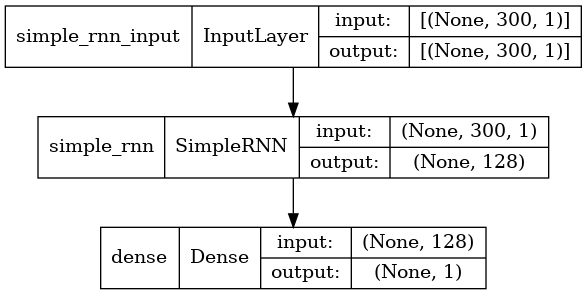

In [11]:
keras.utils.plot_model(model, show_shapes=True)

## Compilacao

In [12]:
model.compile(loss='mean_squared_error', optimizer='rmsprop')


## Fit - Treino

In [13]:
X2 = X.T
X2 = X2[np.newaxis,...]
X2.T.shape

(7833, 300, 1)

In [40]:
Y2 = Y.T
Y2 = Y2[np.newaxis,...]
Y2.T.shape

(7833, 1, 1)

In [14]:
history = model.fit(x=X2.T,y=Y,epochs=10,verbose=2)


2023-01-31 11:54:33.661371: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 9399600 exceeds 10% of free system memory.


Epoch 1/10


2023-01-31 11:56:57.499411: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 4915200 exceeds 10% of free system memory.
2023-01-31 11:56:57.997255: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 4915200 exceeds 10% of free system memory.
2023-01-31 11:56:59.635365: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 4915200 exceeds 10% of free system memory.
2023-01-31 11:56:59.638181: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 4915200 exceeds 10% of free system memory.


245/245 - 176s - loss: 0.0925 - 176s/epoch - 717ms/step
Epoch 2/10
245/245 - 36s - loss: 0.0919 - 36s/epoch - 147ms/step
Epoch 3/10
245/245 - 33s - loss: 0.0918 - 33s/epoch - 136ms/step
Epoch 4/10
245/245 - 35s - loss: 0.0917 - 35s/epoch - 141ms/step
Epoch 5/10
245/245 - 35s - loss: 0.0914 - 35s/epoch - 144ms/step
Epoch 6/10
245/245 - 34s - loss: 0.0915 - 34s/epoch - 139ms/step
Epoch 7/10
245/245 - 36s - loss: 0.0916 - 36s/epoch - 145ms/step
Epoch 8/10
245/245 - 36s - loss: 0.0916 - 36s/epoch - 146ms/step
Epoch 9/10
245/245 - 36s - loss: 0.0915 - 36s/epoch - 146ms/step
Epoch 10/10
245/245 - 34s - loss: 0.0915 - 34s/epoch - 140ms/step


## Salva Rede

In [ ]:
path='pesos/treino_rede666.h5'
model.save(path)


# Enviando Rede

In [ ]:
!pip install paramiko


In [ ]:
import os
import paramiko


In [ ]:
ssh = paramiko.SSHClient()
ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh.connect("191.252.219.136", username="root", password="Digicom2004$")
sftp = ssh.open_sftp()
sftp.put("pesos/treino_rede666.h5", "/root/executa-rede/redes/treino_rede666.h5")
sftp.close()
ssh.close()


# Registra Treinamento

In [ ]:
#import requests
url = 'http://vps-40d69db1.vps.ovh.ca:23004/api/TreinoRedes/executouTreinamento'
myobj = {'id': 666}
x = requests.post(url, json = myobj)
print(x.text)
